In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('D:\github\Country-data.csv')

In [50]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [52]:
data.fillna(method='ffill', inplace= True)

In [53]:
print(data.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [54]:
data = data.drop('country', axis = 1)

In [55]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [56]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [57]:
data_normalized = normalize(data_scaled)

In [58]:
data_normalized = pd.DataFrame(data_normalized)

In [59]:
pca = PCA(n_components = 2)
data_principal = pca.fit_transform(data_normalized)
data_principal = pd.DataFrame(data_principal)
data_principal.columns = ['P1', 'P2']
print(data_principal.head())

         P1        P2
0  0.931544 -0.052894
1 -0.431395 -0.144087
2  0.133125 -0.373318
3  0.876380  0.190816
4 -0.725008  0.325375


In [69]:
db_default = DBSCAN(eps = 0.5, min_samples = 50).fit(data_principal)
labels = db_default.labels_

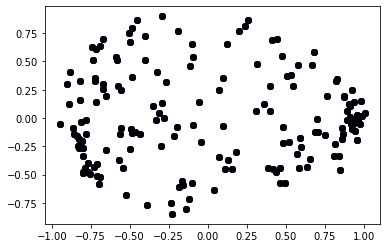

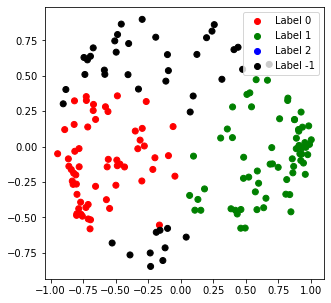

In [70]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
cvec = [colours[label] for label in labels]
r = plt.scatter(data_principal['P1'], data_principal['P2'], color ='r');
g = plt.scatter(data_principal['P1'], data_principal['P2'], color ='g');
b = plt.scatter(data_principal['P1'], data_principal['P2'], color ='b');
k = plt.scatter(data_principal['P1'], data_principal['P2'], color ='k');
plt.figure(figsize =(5, 5))
plt.scatter(data_principal['P1'], data_principal['P2'], c = cvec)
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

In [60]:
db = DBSCAN(eps = 0.5, min_samples = 100).fit(data_principal)
labels1 = db.labels_

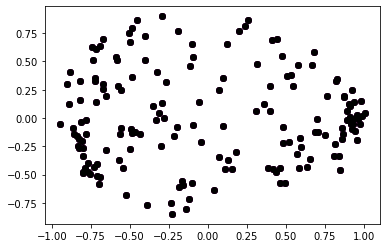

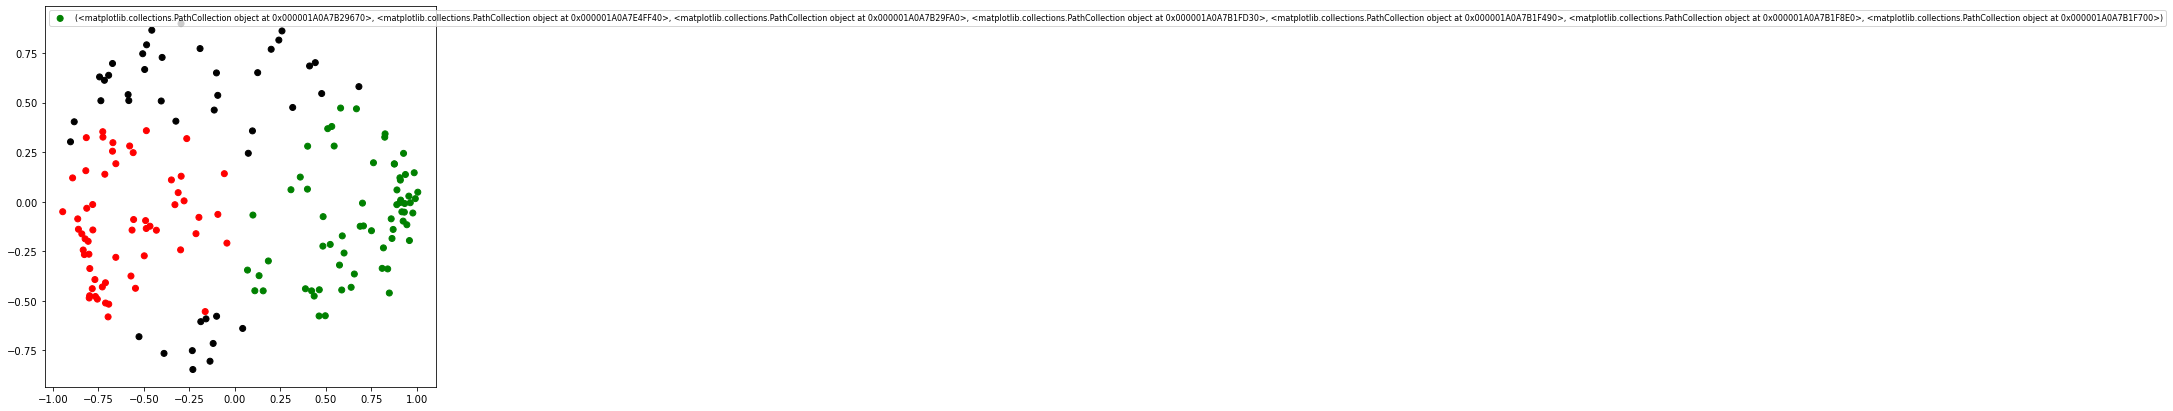

In [64]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
  
r = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
        data_principal['P1'], data_principal['P2'], marker ='o', color = colors[6])
  
plt.figure(figsize =(7, 7))
plt.scatter(data_principal['P1'], data_principal['P2'], c = cvec)
plt.legend(((r, g, b, c, y, m, k),
           'Label 0', 'Label 1', 'Label 2', 'Label 3','Label 4',
            'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()